In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
df.drop(columns=['RowNumber' , 'Surname' , 'CustomerId'] , inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df = pd.get_dummies(df , columns=['Geography' , 'Gender'] , drop_first=True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=10)

In [14]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [15]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [16]:
X.shape

(10000, 11)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
X_train_scaled

array([[ 1.78974378,  0.94394225,  1.04271518, ...,  1.73436329,
        -0.57388614,  0.91255717],
       [ 0.26040483,  2.35932486, -0.35053238, ..., -0.57658047,
         1.74250594, -1.09582175],
       [-0.22526362, -0.47144036,  0.3460914 , ..., -0.57658047,
         1.74250594,  0.91255717],
       ...,
       [-1.97160337,  0.09471269,  0.3460914 , ...,  1.73436329,
        -0.57388614, -1.09582175],
       [ 0.60140608, -0.47144036, -1.04715616, ..., -0.57658047,
        -0.57388614, -1.09582175],
       [ 0.21907135,  0.09471269,  1.73933896, ...,  1.73436329,
        -0.57388614,  0.91255717]])

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [20]:
model = Sequential()

In [21]:
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid', input_dim=3))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 5)                 60        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 594
Trainable params: 594
Non-trainable pa

In [23]:
model.compile(loss='binary_crossentropy' , optimizer='Adam' , metrics=['accuracy'])

In [24]:
history = model.fit(X_train_scaled , y_train , epochs=500 , validation_split=0.2)

Epoch 1/500
200/200 [==============================] - 3s 5ms/step - loss: 0.5554 - accuracy: 0.7570 - val_loss: 0.4709 - val_accuracy: 0.8112
Epoch 2/500
200/200 [==============================] - 1s 3ms/step - loss: 0.4633 - accuracy: 0.7948 - val_loss: 0.4380 - val_accuracy: 0.8112
Epoch 3/500
200/200 [==============================] - 1s 4ms/step - loss: 0.4340 - accuracy: 0.7964 - val_loss: 0.4174 - val_accuracy: 0.8119
Epoch 4/500
200/200 [==============================] - 1s 3ms/step - loss: 0.4097 - accuracy: 0.8252 - val_loss: 0.4011 - val_accuracy: 0.8281
Epoch 5/500
200/200 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.8383 - val_loss: 0.3868 - val_accuracy: 0.8350
Epoch 6/500
200/200 [==============================] - 1s 3ms/step - loss: 0.3740 - accuracy: 0.8491 - val_loss: 0.3772 - val_accuracy: 0.8406
Epoch 7/500
200/200 [==============================] - 1s 3ms/step - loss: 0.3634 - accuracy: 0.8508 - val_loss: 0.3640 - val_accuracy: 0.8456

In [25]:
model.save("ee.ww")

In [26]:
model.layers[0].get_weights()

[array([[ 0.01912471,  0.55736583,  0.01773033, -0.24732238, -0.31992307,
         -0.09059466,  0.18981129,  0.29422173, -0.25071293,  0.09696618,
         -0.5986556 ],
        [ 0.2777123 ,  0.01757401,  0.16294643, -1.0507509 , -0.6962432 ,
          1.0227629 ,  0.42310742, -1.1063659 , -0.8251154 , -0.8313195 ,
         -0.06847789],
        [ 0.08603887,  0.20748094, -0.03603177,  0.5792298 , -0.24705796,
          0.23239867, -0.13128416, -0.11789692,  0.16464107, -0.6445096 ,
          0.06799084],
        [-0.92254156, -0.05576937, -1.0239198 , -0.25257912,  0.58280605,
         -0.69221383, -0.3573073 , -0.00728282, -0.7466407 , -0.17890592,
          0.5566647 ],
        [-1.2865386 ,  1.2191147 , -0.5541955 ,  0.11625364, -0.262709  ,
          0.20168278, -0.1398086 , -0.20487154,  0.3666864 ,  0.8389336 ,
          1.1677558 ],
        [-0.13634697,  0.65718806,  0.34241596,  1.0071334 , -0.04618815,
         -0.03614685, -0.3224312 , -0.04352513, -0.62625813, -0.5565013

In [27]:
model.layers[1].get_weights()

[array([[ 0.94134325, -1.4429578 , -0.15789172, -0.36424902, -0.4922878 ,
         -0.49497077,  0.15054165, -0.67183155, -0.1304583 ,  0.01355138,
          0.35419202],
        [ 0.5850273 , -0.40783173,  0.2963702 ,  0.4706173 ,  0.26937103,
          0.81528866, -0.5973722 , -1.6288112 , -0.03166275, -0.09356529,
          0.67227864],
        [ 0.43763587,  0.37154487,  0.1491257 , -1.0544357 ,  0.10600413,
         -0.00909252, -0.39549127, -0.8078117 ,  0.14430681,  0.20652148,
          0.38634706],
        [-0.68175584,  0.20007753,  0.44923592, -0.31558165,  0.3893882 ,
          0.20203403,  0.2798178 ,  0.4959952 ,  1.0862689 ,  0.8900073 ,
          0.23151076],
        [ 0.49932864, -0.22028333,  0.7326492 , -0.45743525,  0.38054457,
          0.6266542 , -0.15501183,  0.56535745,  0.21303536,  0.11002385,
         -0.29355195],
        [ 0.13067694,  0.5994009 , -1.5845758 ,  0.54602367,  0.41658762,
          0.44372708,  0.61094904,  0.43894345,  0.16653685, -0.0738411

In [28]:
model.layers[2].get_weights()

[array([[ 0.23459895, -0.89047754, -0.3811509 ,  0.4686178 , -0.17989786,
          0.659581  ,  0.30090693,  0.19563398, -0.3437086 , -1.4817854 ,
          0.46877676],
        [-0.3631465 , -0.90099746, -0.3600364 ,  0.68608624,  0.4906753 ,
         -0.6657912 ,  0.3234216 ,  0.67969424, -0.66005176, -0.00977211,
          0.87656647],
        [-0.24052164, -0.25524363, -0.5942964 ,  0.5052232 , -0.9843646 ,
         -0.32538164,  1.1132225 ,  0.16329585, -0.2951143 ,  0.02305124,
         -0.19292197],
        [ 0.9131545 ,  0.39966673, -0.36753407, -0.06594224,  0.02742939,
          0.8252379 , -0.00411289, -0.75724024,  0.8640613 , -1.6177789 ,
         -0.36411232],
        [-0.9368392 ,  0.34189016,  0.7279353 ,  0.1630356 , -0.00264137,
         -0.6839152 ,  0.03577355,  0.08448946,  0.535444  ,  0.47759688,
         -0.07076883],
        [-0.75105697, -0.06665396,  0.40499163,  0.4921231 , -0.45581412,
          0.7252477 , -0.05090935,  0.9977761 , -0.70082384, -0.5821081

In [29]:
model.layers[3].get_weights()

[array([[ 2.9782906 ,  0.78972864,  2.7913046 ,  1.3169241 , -1.1167607 ,
          0.7539231 ,  2.9377935 , -0.7868769 , -1.9806542 , -1.2204562 ,
          0.04724602],
        [ 0.44016385,  0.47967428, -0.22959371,  0.10438562, -0.19017868,
         -0.8179004 , -0.24891026,  0.2182155 ,  1.0723437 ,  1.7575698 ,
         -0.27501193],
        [ 0.8817445 ,  0.23871647, -0.45116958, -0.0650196 ,  1.052934  ,
         -1.0049447 ,  0.40406314, -0.4940018 ,  0.48619384,  0.03699942,
          0.37011972],
        [-0.5711307 , -0.355341  , -0.1737967 , -0.7760228 , -1.1134753 ,
          0.19105521,  0.47383106, -0.2510404 ,  0.20398888,  0.6392724 ,
         -0.47128806],
        [ 0.08181214, -1.1775901 , -0.21826287, -1.197711  ,  0.94726545,
         -1.608539  , -0.8886446 ,  0.2299453 ,  0.6291376 , -1.0582113 ,
         -0.10384565],
        [ 0.4923083 ,  0.82931083, -0.19718102,  0.7559567 , -0.17969154,
          0.35111305,  0.37600243,  0.01225983, -0.3994683 , -3.4858375

In [30]:
model.layers[4].get_weights()

[array([[ 0.17657948,  1.2058253 ,  0.5767514 , -0.13148746,  1.2745737 ],
        [-0.6958277 ,  0.56553787,  0.540314  , -0.42038763,  0.7926182 ],
        [ 1.5684897 ,  0.33933827,  0.23144317, -0.41019833, -0.4031985 ],
        [ 0.97284055,  2.2833374 ,  1.3407906 , -0.4640578 , -1.0115429 ],
        [ 1.0997252 , -3.157163  , -1.7043904 , -0.02815467, -0.59709483],
        [ 0.10143881,  0.28283095, -0.68582636,  0.24573612, -1.1754194 ],
        [ 0.28038555,  0.7994675 ,  1.1226938 , -0.5078207 , -0.94975775],
        [-3.7220595 , -0.05906392, -0.4630517 , -0.26109326,  0.3381473 ],
        [-0.01160774, -0.6930367 , -2.0665474 , -0.50407565,  0.21829705],
        [-1.0314001 ,  0.41944095, -1.2933    , -0.10011625,  1.2711005 ],
        [-1.1099731 , -1.1163304 ,  0.37585703, -0.5189223 ,  0.47922808]],
       dtype=float32),
 array([-0.52360076,  0.19831435,  0.289033  ,  0.        ,  0.29767492],
       dtype=float32)]

In [31]:
model.layers[5].get_weights()

[array([[ 2.7926326 ],
        [ 1.2306937 ],
        [ 3.0381632 ],
        [ 0.10984206],
        [-1.3812716 ]], dtype=float32),
 array([-0.04504913], dtype=float32)]

In [32]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [33]:
y_pred = np.where(y_log>0.5 , 1 , 0)

In [34]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred )

0.842

In [35]:
import matplotlib.pyplot as plt

In [36]:
history

In [37]:
history.history

{'loss': [0.55543452501297,
  0.46327415108680725,
  0.4339810907840729,
  0.40973103046417236,
  0.3889716863632202,
  0.37403297424316406,
  0.3633743226528168,
  0.3561978042125702,
  0.3511142432689667,
  0.3477856516838074,
  0.3446046710014343,
  0.3420528173446655,
  0.34008488059043884,
  0.3376035690307617,
  0.33636096119880676,
  0.335519403219223,
  0.3337785601615906,
  0.3343728184700012,
  0.33265137672424316,
  0.33120641112327576,
  0.32964733242988586,
  0.3294459879398346,
  0.3277246952056885,
  0.3283909261226654,
  0.3274212181568146,
  0.326299786567688,
  0.32620951533317566,
  0.3253706991672516,
  0.32435813546180725,
  0.32330623269081116,
  0.32311344146728516,
  0.3225977420806885,
  0.3220747113227844,
  0.3211488723754883,
  0.3210926353931427,
  0.3200720548629761,
  0.31929612159729004,
  0.3189752995967865,
  0.318410187959671,
  0.3192770481109619,
  0.3174004852771759,
  0.3174782991409302,
  0.316446453332901,
  0.31700900197029114,
  0.315960615873

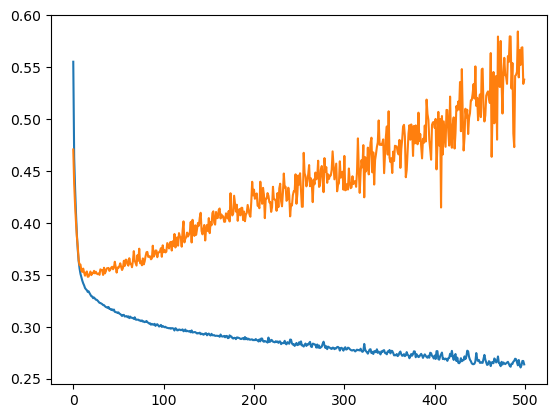

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

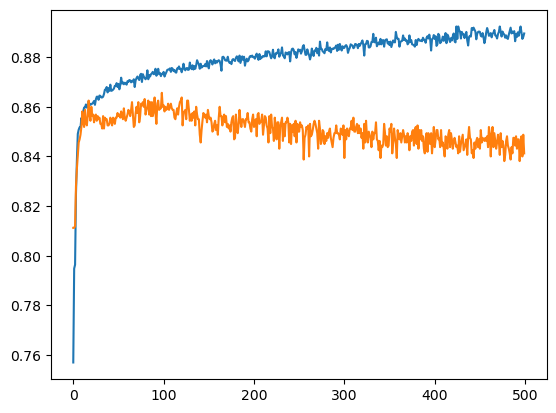

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])